### Часть 1. EDA

#### 1.1. Загрузка данных

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [483]:
data = pd.read_csv("AB_NYC_2019.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#### 1.2. Основные шаги работы с данными

##### 1.2.1. Анализ данных

In [484]:
data = data.drop("id", axis=1).drop("name", axis=1).drop("host_id", axis=1).drop("host_name", axis=1).drop("last_review", axis=1)
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [485]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [486]:
data.shape

(48895, 11)

In [487]:
data.empty

False

In [488]:
nan_count = data.isna().sum()
nan_count

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##### 1.2.2. Преобразование признаков

In [489]:
data[data['reviews_per_month'].isna()]['number_of_reviews'].value_counts(normalize=True)

number_of_reviews
0    1.0
Name: proportion, dtype: float64

Из запроса выше видно, что NaN-значение reviews_per_month коррелирует с признаком number_rewiev: NaN -> 0. Поэтому я считаю, что значение NaN в признаке reviews_per_month можно заменить на 0. В общем-то логично: если нет reviews, то и количество в месяц равно 0

In [490]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [491]:
nan_count = data.isna().sum()
nan_count

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [492]:
data['neighbourhood_group'].value_counts(normalize=True)

neighbourhood_group
Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: proportion, dtype: float64

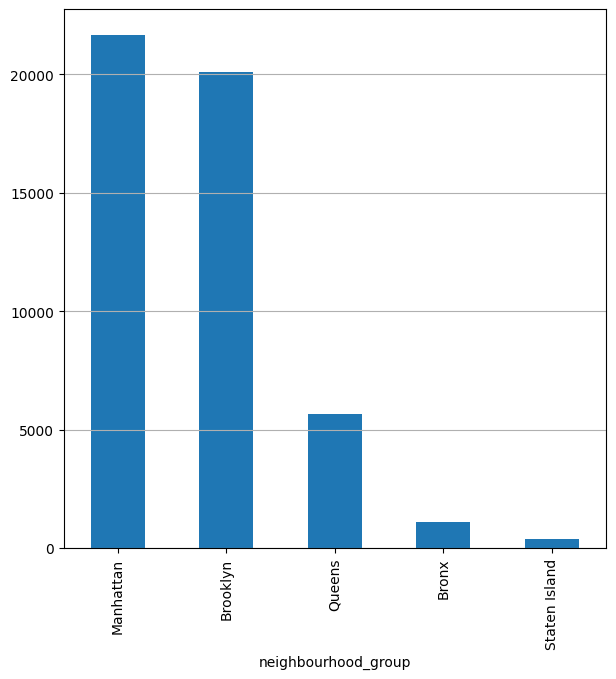

In [493]:
data['neighbourhood_group'].value_counts().plot.bar(figsize=(7, 7))
plt.grid(axis='y')

In [494]:
data['neighbourhood'].value_counts(normalize=True)

neighbourhood
Williamsburg          0.080172
Bedford-Stuyvesant    0.075959
Harlem                0.054361
Bushwick              0.050414
Upper West Side       0.040311
                        ...   
Fort Wadsworth        0.000020
Richmondtown          0.000020
New Dorp              0.000020
Rossville             0.000020
Willowbrook           0.000020
Name: proportion, Length: 221, dtype: float64

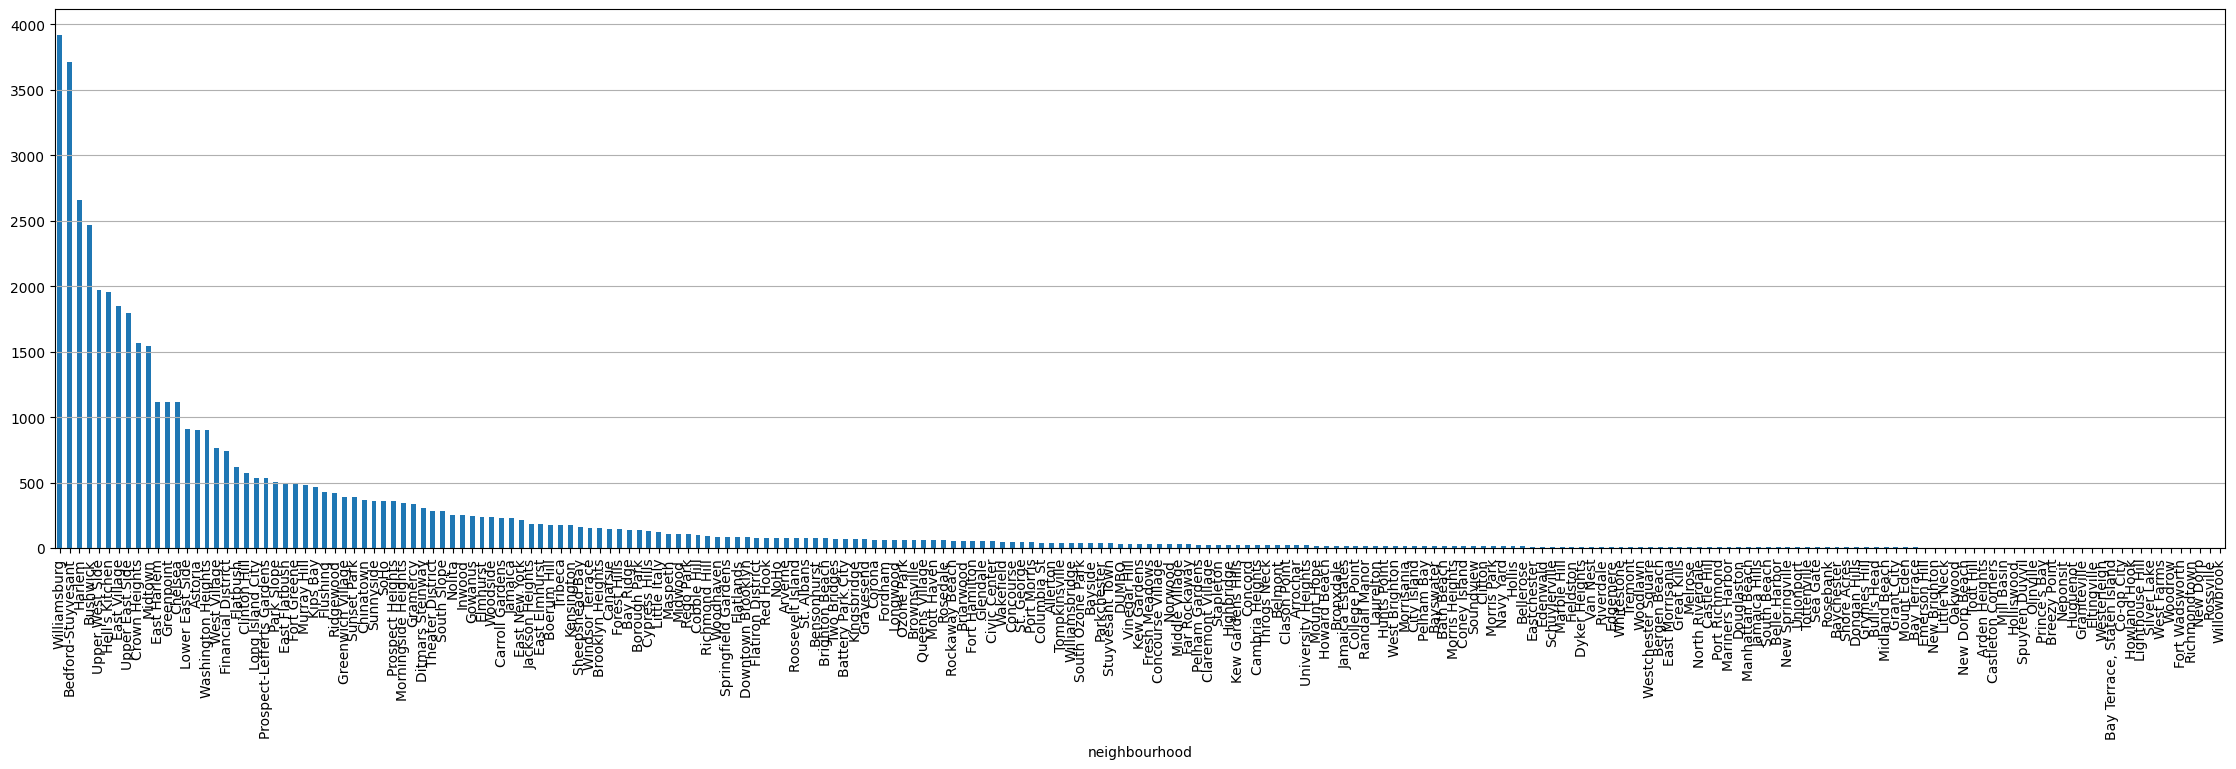

In [495]:
data['neighbourhood'].value_counts().plot.bar(figsize=(28, 7))
plt.grid(axis='y')

In [496]:
data['room_type'].value_counts(normalize=True)

room_type
Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: proportion, dtype: float64

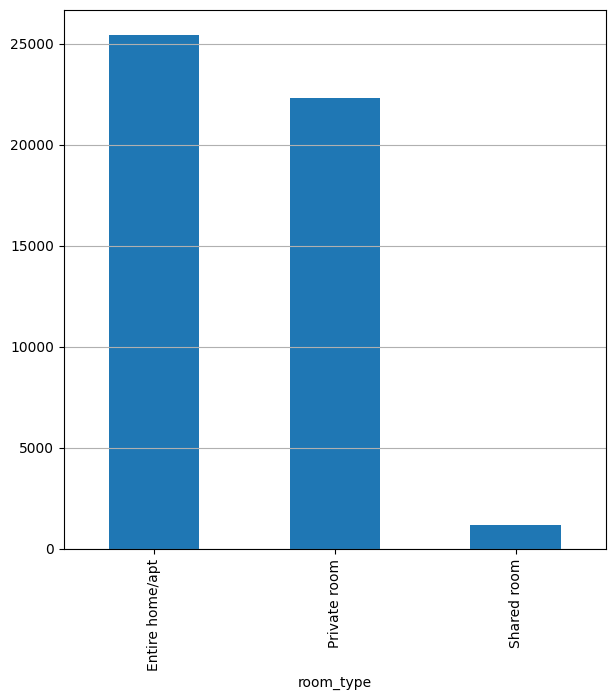

In [497]:
data['room_type'].value_counts().plot.bar(figsize=(7, 7))
plt.grid(axis='y')

##### 1.2.3. Преобразование категориальных признаков

In [498]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

In [499]:
def EncodeCategoryOneHot(data, feature):
    encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
    data_encoded = encoder.fit_transform(data[[feature]])
    data_encoded = data.join(data_encoded)
    data_encoded = data_encoded.drop(feature, axis=1)
    return data_encoded

In [500]:
def EncodeCategoryOrdinal(data, feature):
    encoder = OrdinalEncoder().set_output(transform="pandas")
    data_encoded = encoder.fit_transform(data[[feature]])
    data_cleared = data.drop(feature, axis=1)
    data_results = data_cleared.join(data_encoded)
    return data_results

In [501]:
data_onehot_encoded = EncodeCategoryOneHot(data, "neighbourhood_group")
data_onehot_encoded = EncodeCategoryOneHot(data_onehot_encoded, "neighbourhood")
data_onehot_encoded = EncodeCategoryOneHot(data_onehot_encoded, "room_type")
data_onehot_encoded

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40.68514,-73.95976,89,1,270,4.64,1,194,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,0.00,2,9,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48891,40.70184,-73.93317,40,4,0,0.00,2,36,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48892,40.81475,-73.94867,115,10,0,0.00,1,27,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48893,40.75751,-73.99112,55,1,0,0.00,6,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [502]:
data_ordinal_encoded = EncodeCategoryOrdinal(data, "neighbourhood_group")
data_ordinal_encoded = EncodeCategoryOrdinal(data_ordinal_encoded, "neighbourhood")
data_ordinal_encoded = EncodeCategoryOrdinal(data_ordinal_encoded, "room_type")
data_ordinal_encoded

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,40.64749,-73.97237,149,1,9,0.21,6,365,1.0,108.0,1.0
1,40.75362,-73.98377,225,1,45,0.38,2,355,2.0,127.0,0.0
2,40.80902,-73.94190,150,3,0,0.00,1,365,2.0,94.0,1.0
3,40.68514,-73.95976,89,1,270,4.64,1,194,1.0,41.0,0.0
4,40.79851,-73.94399,80,10,9,0.10,1,0,2.0,61.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,0.00,2,9,1.0,13.0,1.0
48891,40.70184,-73.93317,40,4,0,0.00,2,36,1.0,28.0,1.0
48892,40.81475,-73.94867,115,10,0,0.00,1,27,2.0,94.0,0.0
48893,40.75751,-73.99112,55,1,0,0.00,6,2,2.0,95.0,2.0


##### 1.2.3. Распределение признаков
Распределение признаков представлено только для набора данных, в которых категориальные данные заменены числами. В случае OneHot енкодера, получилось очень много столбцов, в следствии чего, тепловая карта отображается в виде, не подлежащим интепретации

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'neighbourhood_group'}>],
       [<Axes: title={'center': 'neighbourhood'}>,
        <Axes: title={'center': 'room_type'}>, <Axes: >]], dtype=object)

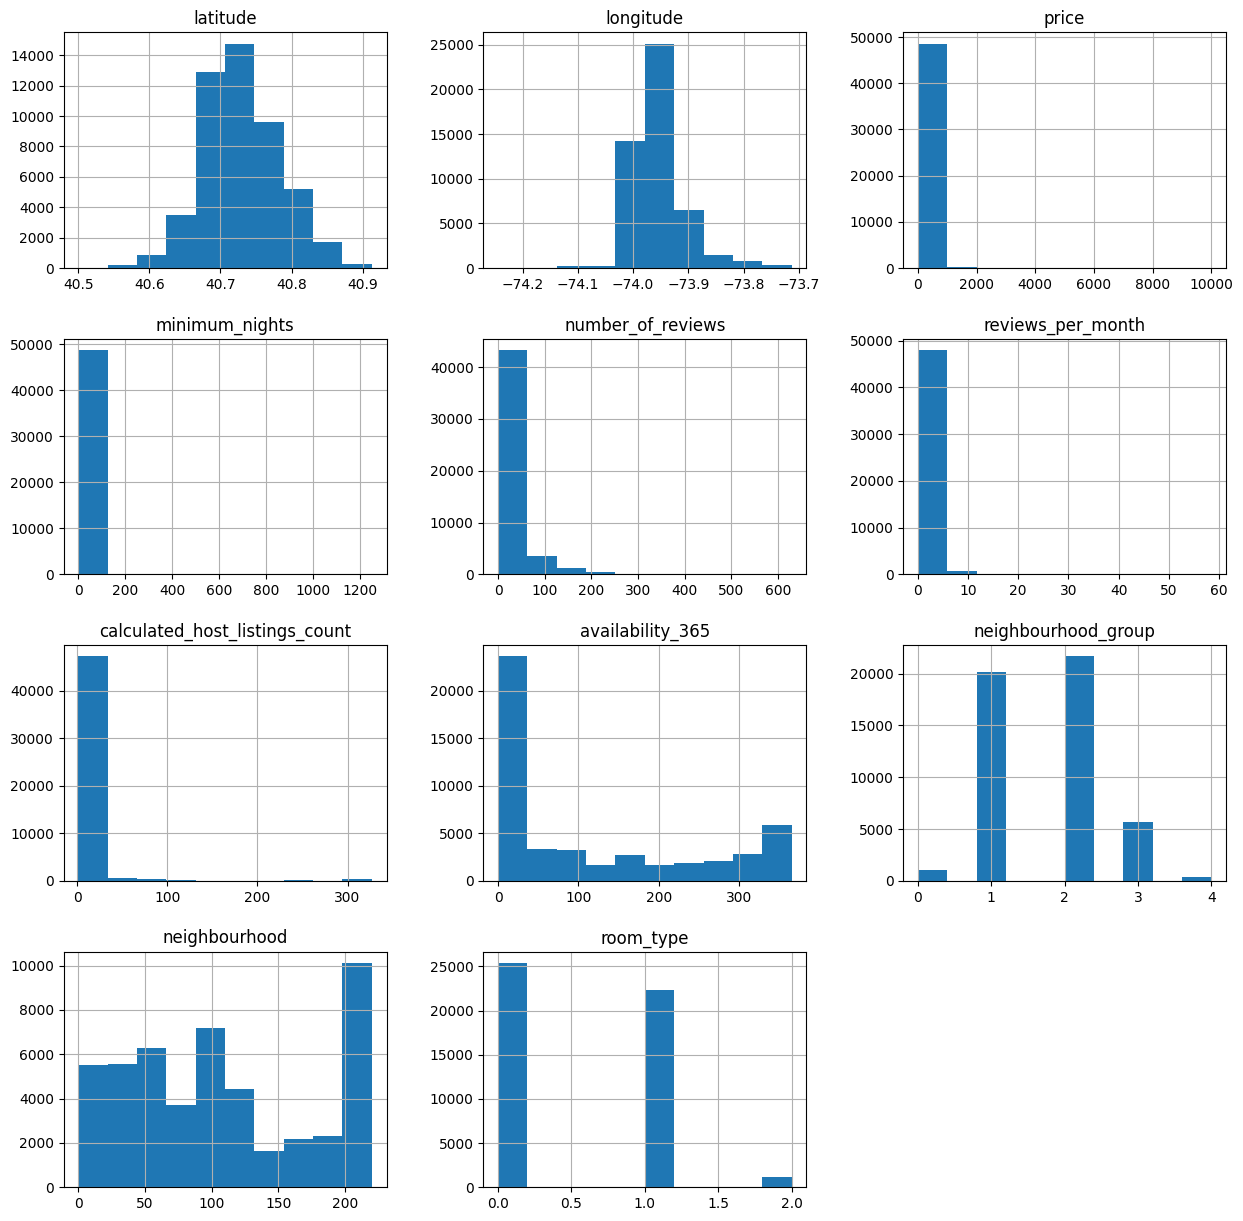

In [503]:
data_ordinal_encoded.hist(figsize=(15, 15))

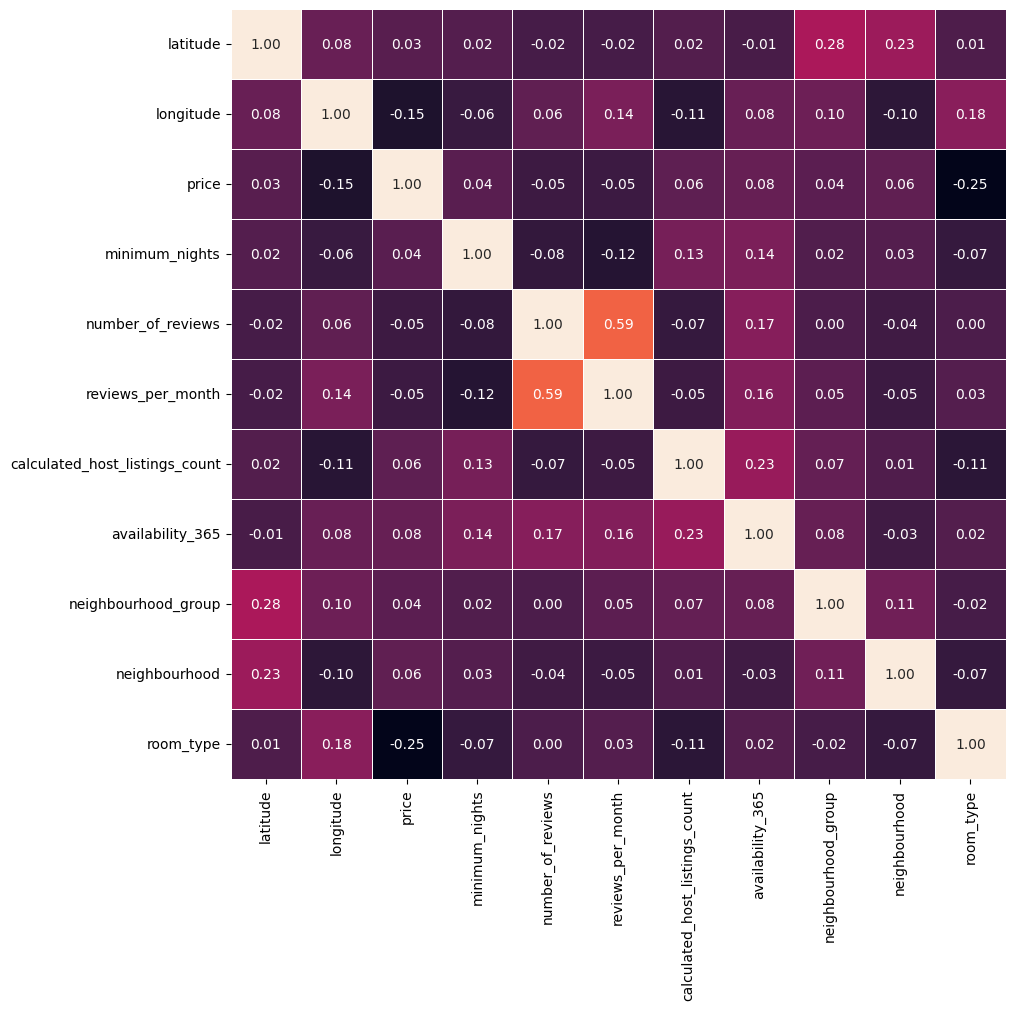

In [504]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_ordinal_encoded.corr(), annot=True, cbar=False, linewidths=0.5, fmt='.2f')
plt.show()

In [505]:
#sns.pairplot(data_ordinal_encoded, hue='price', height=1.5)

### Часть 2. Preprocessing & Feature Engineering

#### 2.1. Работа с категориальными переменными

In [506]:
features_names = data_ordinal_encoded.columns.tolist()
print(features_names)

['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group', 'neighbourhood', 'room_type']


In [507]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [508]:
scaler = StandardScaler()
data_ordinal_encoded_std_scaled = scaler.fit_transform(data_ordinal_encoded.to_numpy())
data_ordinal_encoded_std_scaled = pd.DataFrame(data_ordinal_encoded_std_scaled, columns = features_names)

In [509]:
data_ordinal_encoded_std_scaled

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.551511,-0.034716,1.916250,-0.917828,0.012762,0.909359
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.445079,-0.156104,1.840275,0.441222,0.289156,-0.924247
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,-0.682986,-0.186451,1.916250,0.441222,-0.190897,0.909359
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,2.221978,-0.186451,0.617065,-0.917828,-0.961892,-0.924247
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.620379,-0.186451,-0.856865,0.441222,-0.670950,-0.924247
...,...,...,...,...,...,...,...,...,...,...,...
48890,-0.924616,0.048089,-0.344452,-0.245240,-0.522433,-0.682986,-0.156104,-0.788486,-0.917828,-1.369209,0.909359
48891,-0.497141,0.411637,-0.469373,-0.147729,-0.522433,-0.682986,-0.156104,-0.583352,-0.917828,-1.151003,0.909359
48892,1.573480,0.075821,-0.157070,0.144807,-0.522433,-0.682986,-0.186451,-0.651730,0.441222,-0.190897,-0.924247
48893,0.523774,-0.843881,-0.406912,-0.293996,-0.522433,-0.682986,-0.034716,-0.841669,0.441222,-0.176350,2.742965


array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'neighbourhood_group'}>],
       [<Axes: title={'center': 'neighbourhood'}>,
        <Axes: title={'center': 'room_type'}>, <Axes: >]], dtype=object)

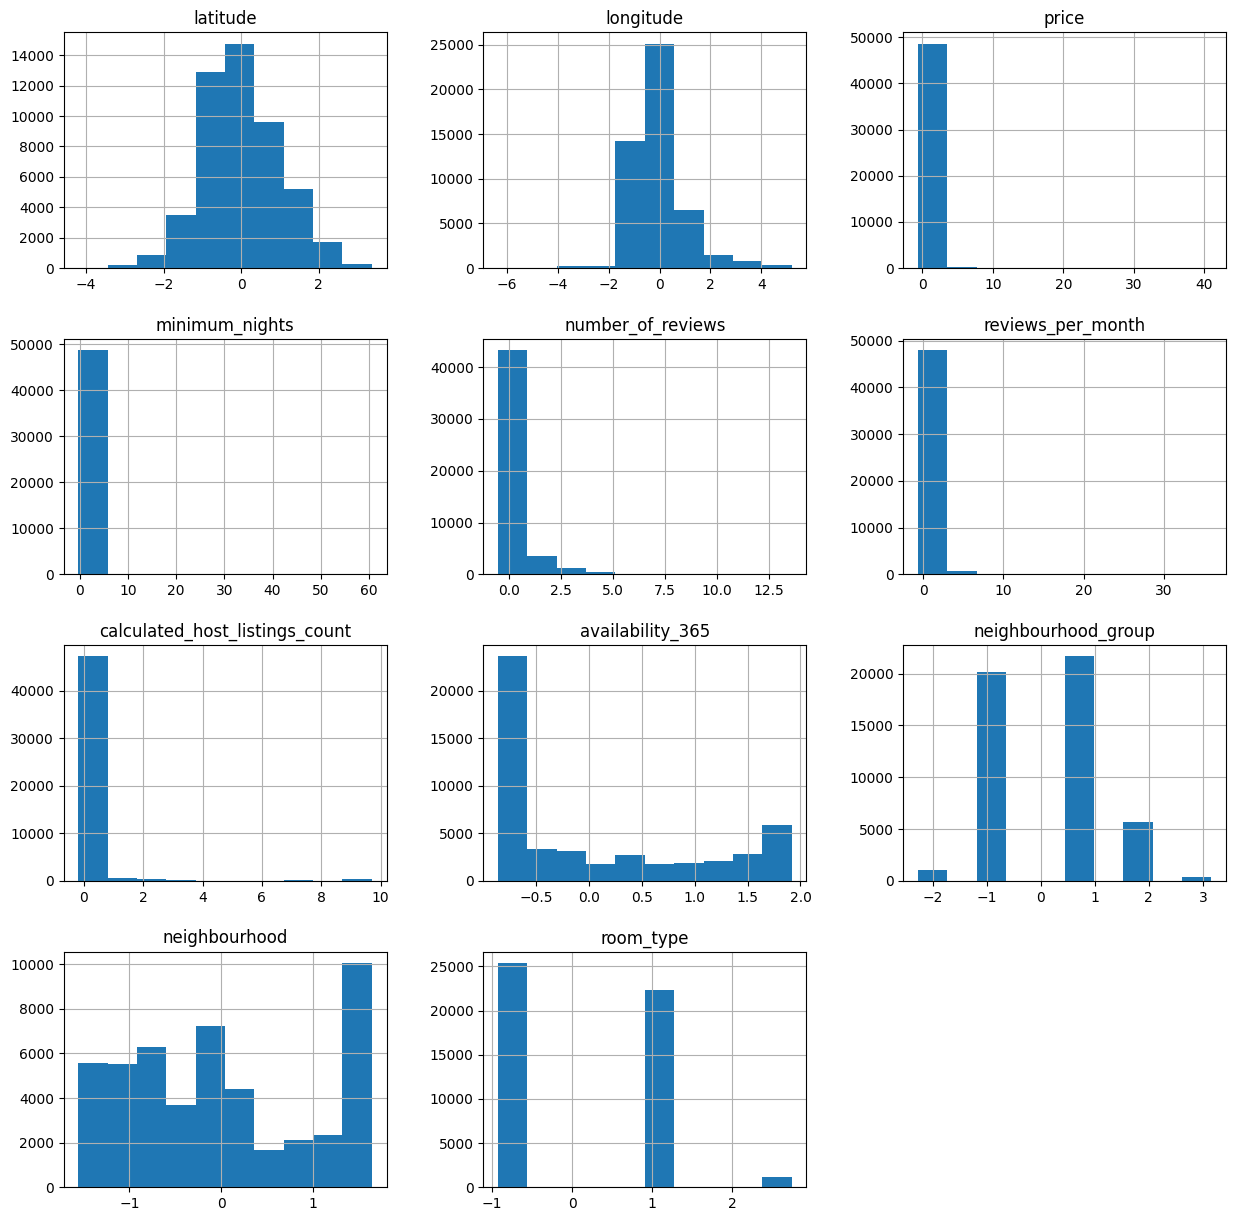

In [510]:
data_ordinal_encoded_std_scaled.hist(figsize=(15, 15))

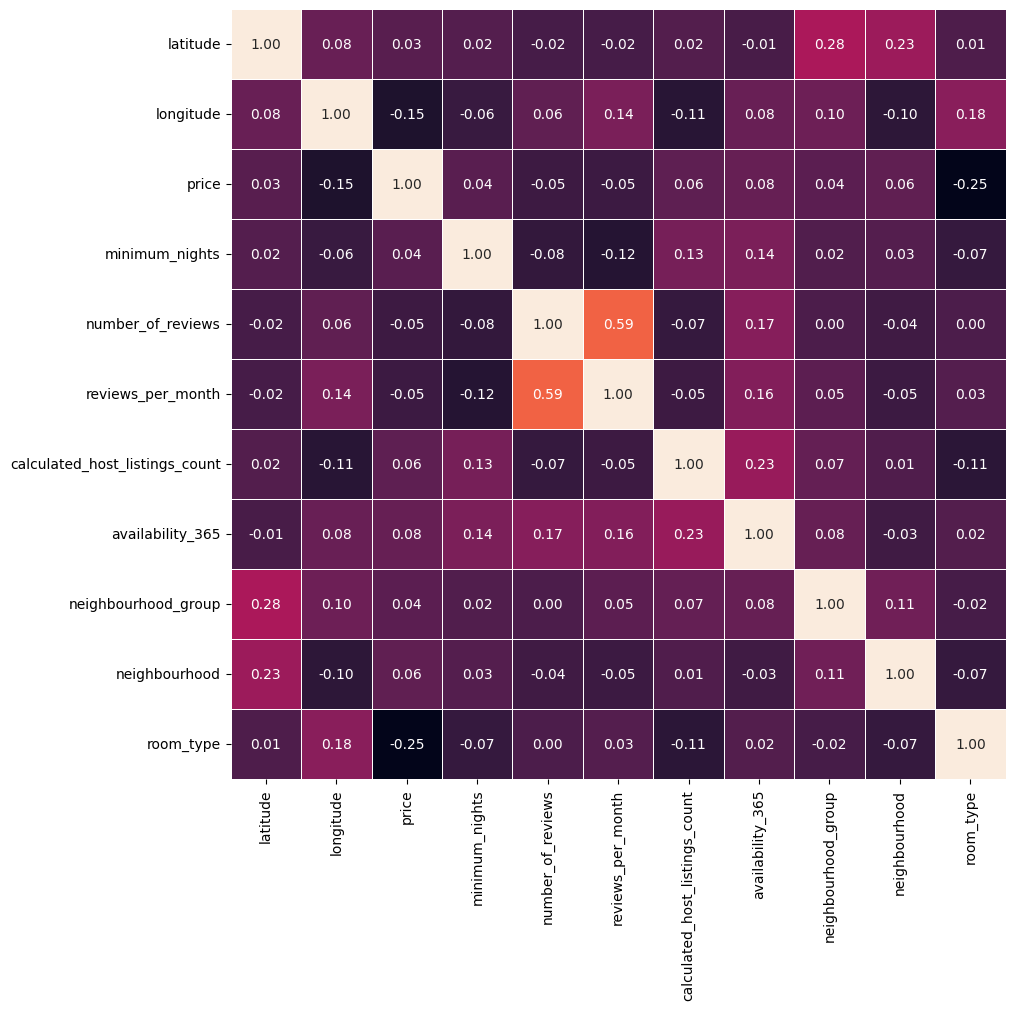

In [511]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_ordinal_encoded_std_scaled.corr(), annot=True, cbar=False, linewidths=0.5, fmt='.2f')
plt.show()

In [512]:
scaler = RobustScaler()
data_ordinal_encoded_robust_scaled = scaler.fit_transform(data_ordinal_encoded.to_numpy())
data_ordinal_encoded_robust_scaled = pd.DataFrame(data_ordinal_encoded_robust_scaled, columns = features_names)

In [513]:
data_ordinal_encoded_robust_scaled

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,-1.035130,-0.356662,0.405660,-0.50,0.173913,-0.103896,5.0,1.409692,-1.0,0.110236,1.0
1,0.418407,-0.600278,1.122642,-0.50,1.739130,0.006494,1.0,1.365639,0.0,0.259843,0.0
2,1.177155,0.294476,0.415094,0.00,-0.217391,-0.240260,0.0,1.409692,0.0,0.000000,1.0
3,-0.519482,-0.087189,-0.160377,-0.50,11.521739,2.772727,0.0,0.656388,-1.0,-0.417323,0.0
4,1.033212,0.249813,-0.245283,1.75,0.173913,-0.175325,0.0,-0.198238,0.0,-0.259843,0.0
...,...,...,...,...,...,...,...,...,...,...,...
48890,-0.610012,0.122449,-0.339623,-0.25,-0.217391,-0.240260,1.0,-0.158590,-1.0,-0.637795,1.0
48891,-0.290762,0.481034,-0.622642,0.25,-0.217391,-0.240260,1.0,-0.039648,-1.0,-0.519685,1.0
48892,1.255632,0.149802,0.084906,1.75,-0.217391,-0.240260,0.0,-0.079295,0.0,0.000000,0.0
48893,0.471684,-0.757346,-0.481132,-0.50,-0.217391,-0.240260,5.0,-0.189427,0.0,0.007874,2.0


array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'neighbourhood_group'}>],
       [<Axes: title={'center': 'neighbourhood'}>,
        <Axes: title={'center': 'room_type'}>, <Axes: >]], dtype=object)

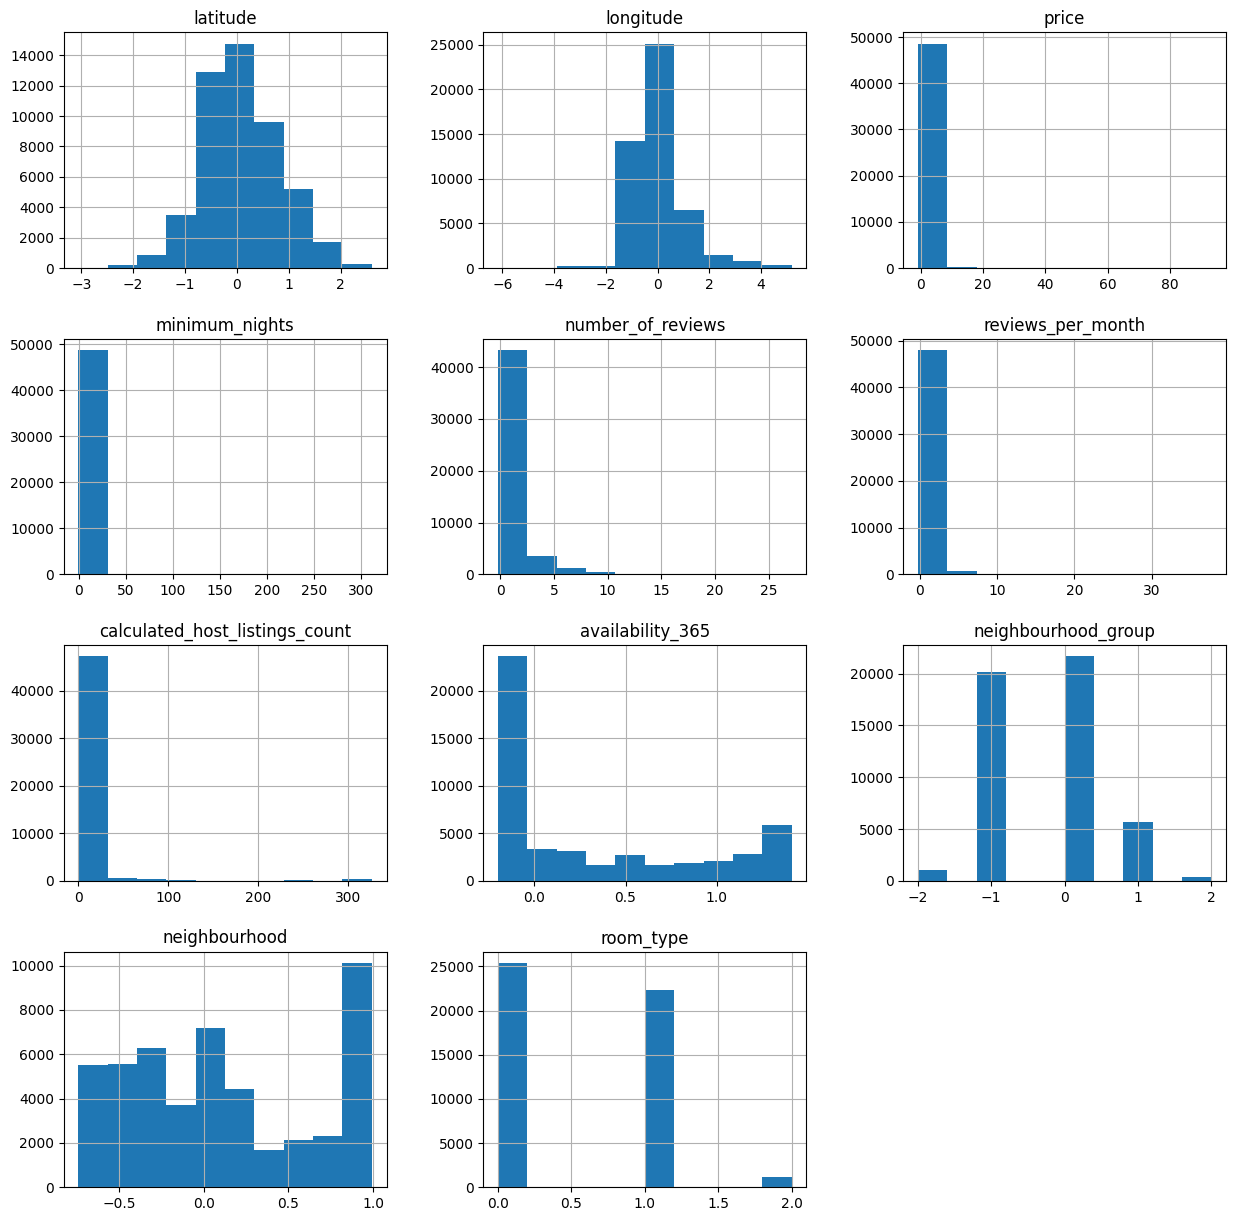

In [514]:
data_ordinal_encoded_robust_scaled.hist(figsize=(15, 15))

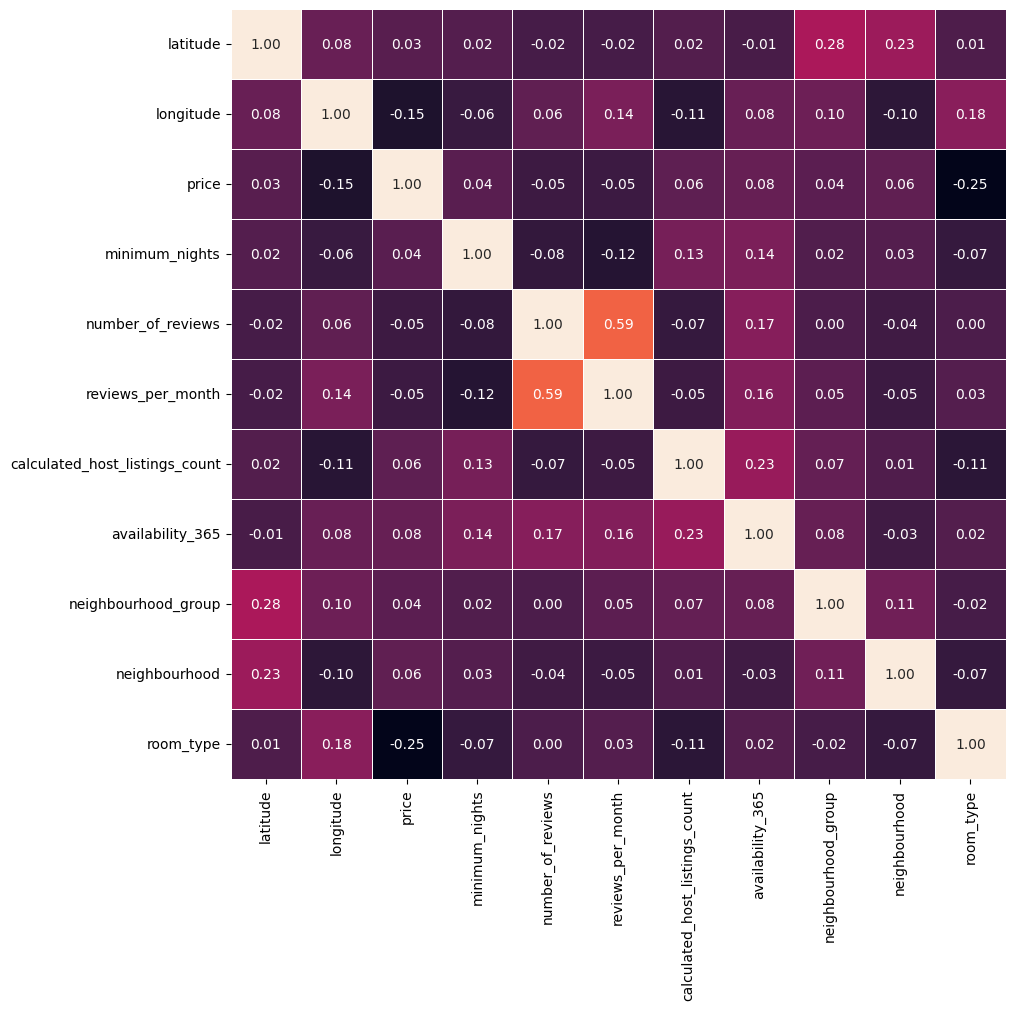

In [515]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_ordinal_encoded_robust_scaled.corr(), annot=True, cbar=False, linewidths=0.5, fmt='.2f')
plt.show()

Честно говоря, шкалирование не помогло - карта корреляций не изменилась. Следующие признаки: minimum_nights, number_of_reviews, reviews_per_month и calculated_host_listings_count имеют маленькую частоту больших значений и большую частоту малых значений (это относится к целевой переменной цена - price). Это может представлять трудность при построении линейных моделей. Решить эту проблему поможет применение log (этот приём нашёл в книжке).

In [516]:
data_ordinal_encoded['minimum_nights'] = data_ordinal_encoded['minimum_nights'].apply(lambda x: np.log(x + 1))
data_ordinal_encoded['number_of_reviews'] = data_ordinal_encoded['number_of_reviews'].apply(lambda x: np.log(x + 1))
data_ordinal_encoded['reviews_per_month'] = data_ordinal_encoded['reviews_per_month'].apply(lambda x: np.log(x + 1))
data_ordinal_encoded['calculated_host_listings_count'] = data_ordinal_encoded['calculated_host_listings_count'].apply(lambda x: np.log(x + 1))
data_ordinal_encoded['price'] = data_ordinal_encoded['price'].apply(lambda x: np.log(x + 1))

data_onehot_encoded['minimum_nights'] = data_onehot_encoded['minimum_nights'].apply(lambda x: np.log(x + 1))
data_onehot_encoded['number_of_reviews'] = data_onehot_encoded['number_of_reviews'].apply(lambda x: np.log(x + 1))
data_onehot_encoded['reviews_per_month'] = data_onehot_encoded['reviews_per_month'].apply(lambda x: np.log(x + 1))
data_onehot_encoded['calculated_host_listings_count'] = data_onehot_encoded['calculated_host_listings_count'].apply(lambda x: np.log(x + 1))
data_onehot_encoded['price'] = data_onehot_encoded['price'].apply(lambda x: np.log(x + 1))

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'neighbourhood_group'}>],
       [<Axes: title={'center': 'neighbourhood'}>,
        <Axes: title={'center': 'room_type'}>, <Axes: >]], dtype=object)

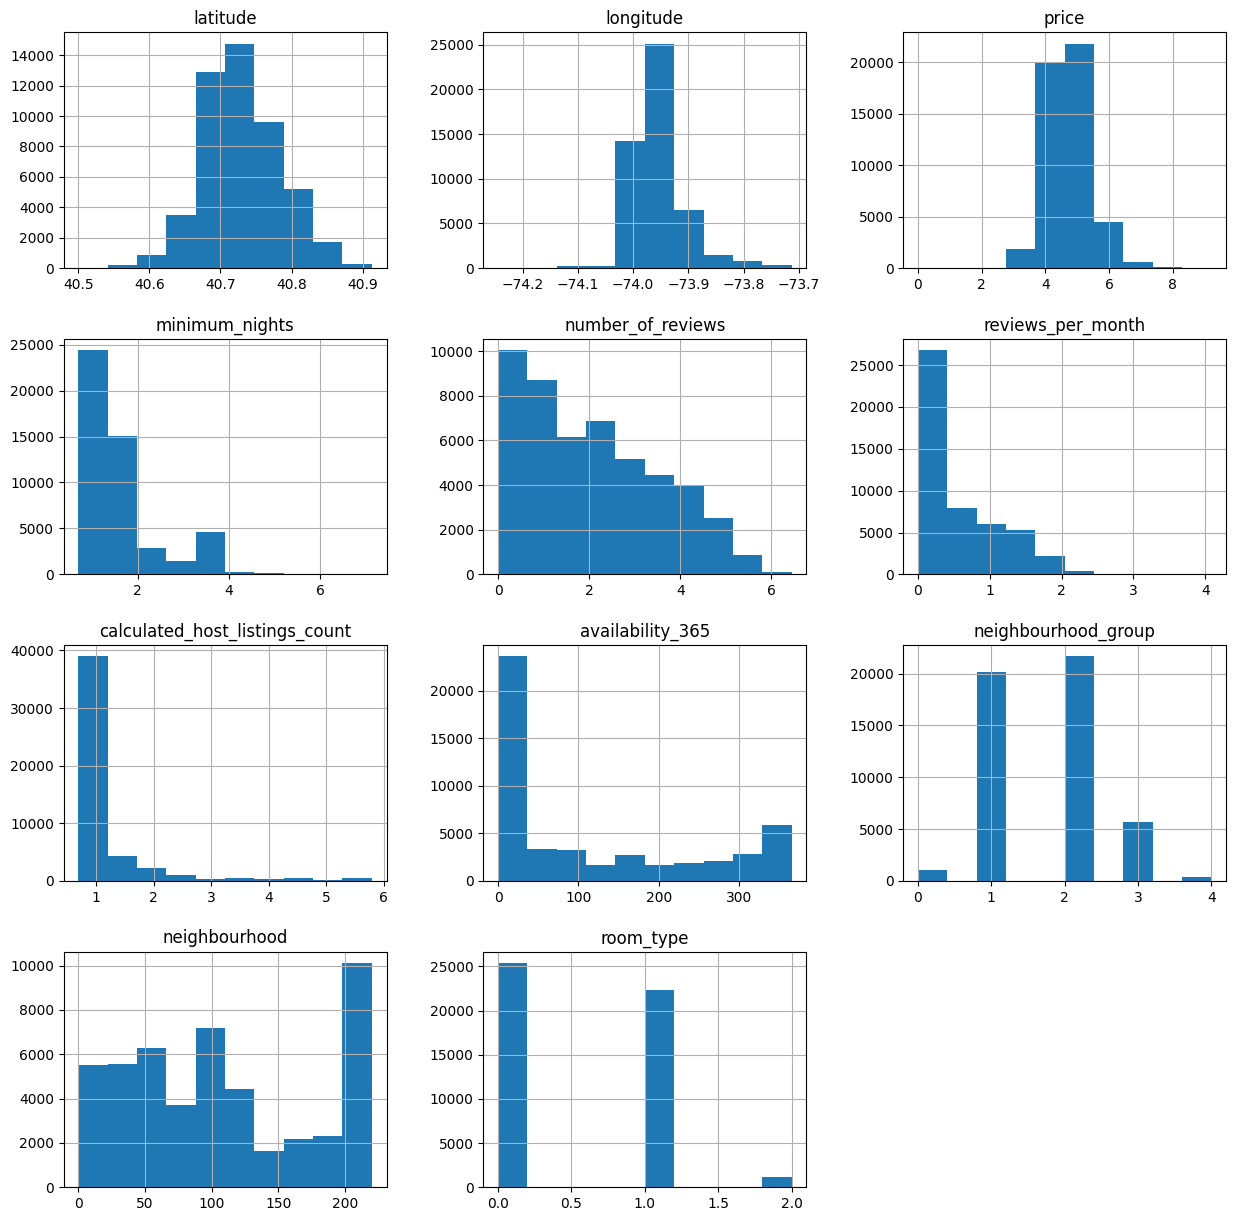

In [517]:
data_ordinal_encoded.hist(figsize=(15, 15))

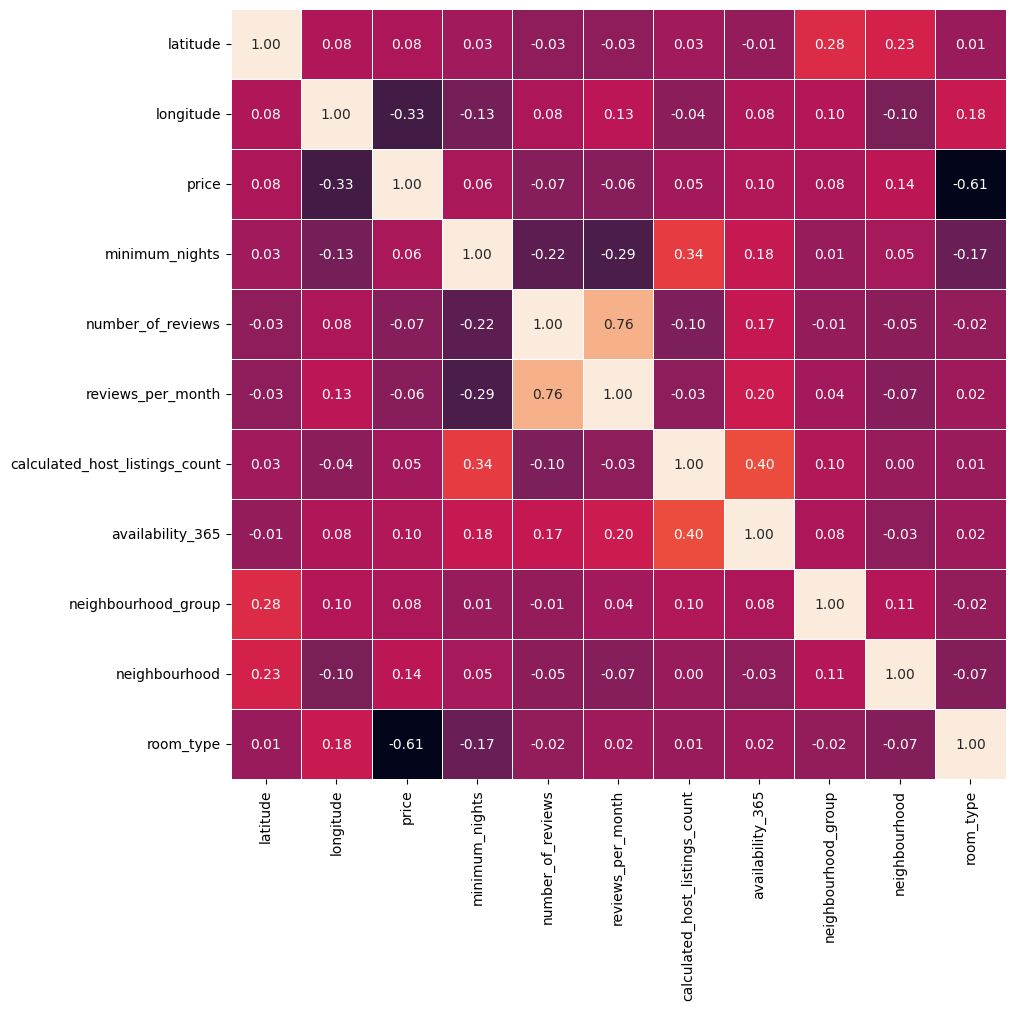

In [518]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_ordinal_encoded.corr(), annot=True, cbar=False, linewidths=0.5, fmt='.2f')
plt.show()

Видно, что карта корреляций изменилась в лучшую сторону.

In [519]:
#sns.pairplot(data_ordinal_encoded, hue='price', height=1.5)

#### 2.2. Построение модели

В качестве линейной модели будет использоваться гребневая регрессия

In [520]:
from sklearn.linear_model import Ridge

In [521]:
y_data_ordinal_encoded = data_ordinal_encoded.loc[:,'price']
data_ordinal_encoded = data_ordinal_encoded.drop('price', axis=1)

In [522]:
y_data_onehot_encoded = data_onehot_encoded.loc[:,'price']
data_onehot_encoded = data_onehot_encoded.drop('price', axis=1)

In [523]:
from sklearn.model_selection import train_test_split

In [524]:
X_ordinal_encoded_train, X_ordinal_encoded_test, y_ordinal_encoded_train, y_ordinal_encoded_test = train_test_split(
    data_ordinal_encoded, y_data_ordinal_encoded, test_size=0.7, random_state=13
)

In [525]:
X_onehot_encoded_train, X_onehot_encoded_test, y_onehot_encoded_train, y_onehot_encoded_test = train_test_split(
    data_onehot_encoded, y_data_onehot_encoded, test_size=0.7, random_state=13
)

In [526]:
ridge_ordinal = Ridge(alpha=10).fit(X_ordinal_encoded_train, y_ordinal_encoded_train)
ridge_onehot = Ridge(alpha=10).fit(X_onehot_encoded_train, y_onehot_encoded_train)


In [527]:
print("Ordinal train score: {:.2f}".format(ridge_ordinal.score(X_ordinal_encoded_train, y_ordinal_encoded_train)))
print("Ordinal test score: {:.2f}".format(ridge_ordinal.score(X_ordinal_encoded_test, y_ordinal_encoded_test)))

Ordinal train score: 0.47
Ordinal test score: 0.47


In [528]:
print("OneHot train score: {:.2f}".format(ridge_onehot.score(X_onehot_encoded_train, y_onehot_encoded_train)))
print("OneHot test score: {:.2f}".format(ridge_onehot.score(X_onehot_encoded_test, y_onehot_encoded_test)))

OneHot train score: 0.56
OneHot test score: 0.55


Результат не впечетляет. Но надо признать, что и исходные данные низкого качества. Стоит отметить, что без логарифмирования score в несколько раз ниже. И интересный факт: OneHot сработало лучше.

### Часть 3. Моделирование

In [529]:
from sklearn.linear_model import RidgeCV

In [530]:
rcv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(data_ordinal_encoded, y_data_ordinal_encoded)
rcv.score(data_ordinal_encoded, y_data_ordinal_encoded)

0.4732659698065792

In [531]:
rcv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(data_onehot_encoded, y_data_onehot_encoded)
rcv.score(data_onehot_encoded, y_data_onehot_encoded)

0.5553081663878334

In [532]:
import sys

np.set_printoptions(threshold=sys.maxsize)
features_coef = pd.Series(rcv.coef_, index = data_onehot_encoded.columns)
features_coef = features_coef[np.abs(features_coef) > 0.5 ]
features_coef

longitude                           -3.138916
neighbourhood_group_Staten Island   -0.717507
neighbourhood_Breezy Point           0.716582
neighbourhood_City Island            0.549191
neighbourhood_Fort Wadsworth         0.937206
neighbourhood_Holliswood             0.621106
neighbourhood_Riverdale              0.742235
neighbourhood_Woodrow                0.810606
room_type_Entire home/apt            0.613040
room_type_Shared room               -0.500233
dtype: float64

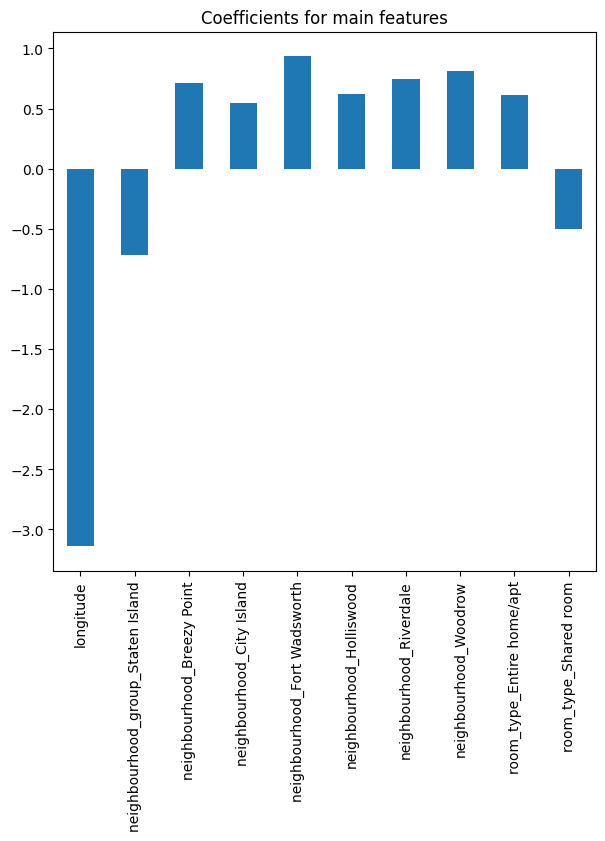

In [533]:
plot = features_coef.plot(title="Coefficients for main features", figsize=(7, 7), rot=90, kind="bar")

In [534]:
from sklearn.linear_model import LassoCV

In [535]:
lcv = LassoCV(cv=5, random_state=13).fit(data_ordinal_encoded, y_data_ordinal_encoded)
lcv.score(data_ordinal_encoded, y_data_ordinal_encoded)

0.41374447197476794

In [536]:
lcv = LassoCV(cv=5, random_state=13).fit(data_onehot_encoded, y_data_onehot_encoded)
lcv.score(data_onehot_encoded, y_data_onehot_encoded)

0.4812433881266043

In [537]:
from sklearn.linear_model import ElasticNetCV

In [538]:
encv = ElasticNetCV(cv=5, random_state=13).fit(data_ordinal_encoded, y_data_ordinal_encoded)
encv.score(data_ordinal_encoded, y_data_ordinal_encoded)

0.4123480535531546

In [539]:
encv = ElasticNetCV(cv=5, random_state=13).fit(data_onehot_encoded, y_data_onehot_encoded)
encv.score(data_onehot_encoded, y_data_onehot_encoded)

0.47811834270581555

Можно сделать следующий вывод: как и следовало ожидать цена зависит от собственно места и соседей